# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Part 1 - Importing Necessary Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Part 2 - Defining the seeds

Seed = '2020'
os.environ['PYTHONHASHSEED'] = Seed
np.random.seed(int(Seed))
random.seed(Seed)
tf.random.set_seed(int(Seed))

In [3]:
# Reading the dataset
dataset_train = pd.read_csv('TSLA.csv')

In [4]:
# Taking Open column as the feature for LSTM from the dataset
nan_index = np.isnan(dataset_train['Open'].values).argmax(axis=0)

In [5]:
dataset_train = dataset_train.loc[:nan_index-1, 'Open']

In [6]:
training_set = dataset_train.to_numpy().reshape(-1,1)

In [8]:
# Normalization of the values by MinMaxScaler [0,1]
sc = MinMaxScaler(feature_range = (0, 1)) 
training_set_scaled = sc.fit_transform(training_set)


In [9]:
# Part 3 - Building the model
# Creating Timesteps and reshaping train dataset into 3D shape to make it a valid input for LSTM algorithm

X_train = []
y_train = []
for i in range(25, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-25:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
len(X_train[2])
X_train.shape

(847, 25, 1)

In [10]:
# Initialising the Sequential Model
model = Sequential()

# First hidden layer and dropout regularization, input layer is passed automatically by input_shape parameter 
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))

# Second hidden layer and dropout regularization 
model.add(LSTM(units = 50))
model.add(Dropout(0.05))

# The output layer
model.add(Dense(units = 1)) 

# Compiling the Recurrent Neural Network
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the training dataset
model.fit(X_train, y_train, epochs = 150, batch_size = 48, validation_split=0.15, shuffle = False)



Epoch 1/150
15/15 [==============================] - 10s 139ms/step - loss: 0.0084 - val_loss: 0.0953
Epoch 2/150
15/15 [==============================] - 1s 39ms/step - loss: 0.0017 - val_loss: 0.0692
Epoch 3/150
15/15 [==============================] - 1s 38ms/step - loss: 0.0010 - val_loss: 0.0613
Epoch 4/150
15/15 [==============================] - 1s 41ms/step - loss: 9.8315e-04 - val_loss: 0.0337
Epoch 5/150
15/15 [==============================] - 1s 38ms/step - loss: 7.0677e-04 - val_loss: 0.0240
Epoch 6/150
15/15 [==============================] - 1s 43ms/step - loss: 7.4632e-04 - val_loss: 0.0220
Epoch 7/150
15/15 [==============================] - 1s 39ms/step - loss: 7.3646e-04 - val_loss: 0.0241
Epoch 8/150
15/15 [==============================] - 1s 38ms/step - loss: 7.6308e-04 - val_loss: 0.0239
Epoch 9/150
15/15 [==============================] - 1s 39ms/step - loss: 7.0310e-04 - val_loss: 0.0219
Epoch 10/150
15/15 [==============================] - 1s 39ms/step - loss:

15/15 [==============================] - 1s 39ms/step - loss: 2.5244e-04 - val_loss: 0.0070
Epoch 80/150
15/15 [==============================] - 1s 39ms/step - loss: 2.5329e-04 - val_loss: 0.0069
Epoch 81/150
15/15 [==============================] - 1s 38ms/step - loss: 2.2938e-04 - val_loss: 0.0063
Epoch 82/150
15/15 [==============================] - 1s 39ms/step - loss: 2.4065e-04 - val_loss: 0.0062
Epoch 83/150
15/15 [==============================] - 1s 38ms/step - loss: 2.2912e-04 - val_loss: 0.0060
Epoch 84/150
15/15 [==============================] - 1s 39ms/step - loss: 2.2259e-04 - val_loss: 0.0059
Epoch 85/150
15/15 [==============================] - 1s 38ms/step - loss: 2.2312e-04 - val_loss: 0.0058
Epoch 86/150
15/15 [==============================] - 1s 39ms/step - loss: 2.2115e-04 - val_loss: 0.0057
Epoch 87/150
15/15 [==============================] - 1s 41ms/step - loss: 2.3302e-04 - val_loss: 0.0062
Epoch 88/150
15/15 [==============================] - 1s 42ms/step -

In [52]:
# Part 4 - Predicting the test dataset (comes after training set)

# Getting the real stock price of the period of test dataset

dataset_test = pd.read_csv('Test.csv')
real_stock_price = dataset_test.loc[:, 'Open'].values

In [53]:
# Getting the predicted stock price of the period

dataset_total = pd.concat((dataset_train, dataset_test.loc[:, 'Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 25:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [54]:
# Creating Timesteps and reshaping test dataset into 3D shape to make it a valid input for LSTM algorithm

X_test = []

for i in range(25, len(inputs)):
    X_test.append(inputs[i-25:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [55]:
# Predicting Test dataset's stock values

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 0s 13ms/step


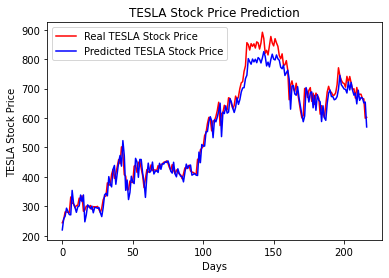

In [56]:
# Visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [57]:
# Part 4 - Evaluating the Model (Computing the mean percentage of error)

dataFrame = pd.DataFrame(columns = ['real', 'predicted', 'absDiff', 'PercDiff'])

dataFrame['real'] = real_stock_price
dataFrame['predicted'] = [i for j in predicted_stock_price for i in j]
dataFrame['absDiff'] = abs(dataFrame['real'] - dataFrame['predicted'])
dataFrame['PercDiff'] = dataFrame['absDiff']*100/dataFrame['real']

print("Mean percentage of error +-" + str(dataFrame['PercDiff'].mean())+"%")


Mean percentage of error +-4.784524306772125%


In [64]:
test_data = dataset_test.loc[len(dataset_test)-25:, 'Open']

In [75]:
x_input = test_data.to_numpy().reshape(-1,1)
x_input

array([[677.380005],
       [677.77002 ],
       [685.700012],
       [712.700012],
       [770.700012],
       [743.099976],
       [728.650024],
       [719.599976],
       [717.419983],
       [704.77002 ],
       [741.5     ],
       [719.799988],
       [741.      ],
       [717.960022],
       [696.409973],
       [699.51001 ],
       [667.590027],
       [703.799988],
       [678.940002],
       [681.059998],
       [680.76001 ],
       [665.799988],
       [664.900024],
       [599.23999 ],
       [602.48999 ]])

(200.0, 700.0)

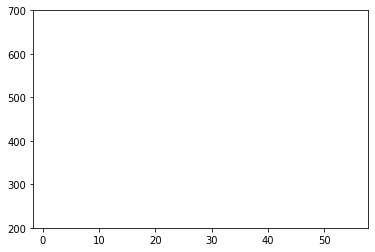

In [76]:
#PART 5 - PREDICTING FUTURE VALUE

temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

output=[]
n_steps=25
i=0
while(i<30):

    if(len(temp_input)>25):
        x_input= np.array(temp_input[1:])
        x_input= x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        output.extend(yhat.tolist())
        i=i+1

print(" ")
day_new=np.arange(1,26)
day_pred=np.arange(26,56)



plt.plot(day_new,sc.inverse_transform(test_data.to_numpy().reshape(-1,1)))
plt.plot(day_pred,sc.inverse_transform(output))

plt.ylim([200,700])




In [72]:
test_data

192    677.380005
193    677.770020
194    685.700012
195    712.700012
196    770.700012
197    743.099976
198    728.650024
199    719.599976
200    717.419983
201    704.770020
202    741.500000
203    719.799988
204    741.000000
205    717.960022
206    696.409973
207    699.510010
208    667.590027
209    703.799988
210    678.940002
211    681.059998
212    680.760010
213    665.799988
214    664.900024
215    599.239990
216    602.489990
Name: Open, dtype: float64

In [48]:
dataset_test[:192]

192    677.380005
193    677.770020
194    685.700012
195    712.700012
196    770.700012
197    743.099976
198    728.650024
199    719.599976
200    717.419983
201    704.770020
202    741.500000
203    719.799988
204    741.000000
205    717.960022
206    696.409973
207    699.510010
208    667.590027
209    703.799988
210    678.940002
211    681.059998
212    680.760010
213    665.799988
214    664.900024
215    599.239990
216    602.489990
Name: Open, dtype: float64